# **[Term Project] 자동차 생산 공정 데이터 분석을 통한 생산성 개선 방안 도출**

- 이름: 김창영
- 학번: 2018****

# 1. 문제 정의

자동차 생산 공정 데이터 분석을 통해 생산성 개선 방안을 도출한다. <br>
- 조업시간
    - 1일 근무시간을 기초로 하루의 시업 시간과 종업 시간 사이의 총 시간
    - 휴식, 식사 수주물량 부족 등 `계획정지시간`을 포함
- 부하시간
    - `부하시간`=`조업시간` - `계획정지시간`
    - `조업시간`에서 `계획정지시간`을 제외하고 설비가 정상적인 상태에서 실제로 가동되어야 할 시간
- 가동시간
    - `가동시간` = `부하시간` - `정지시간`
    - 설비의 `부하시간`에서 `정지시간`을 제외한 시간으로, 설비가 실제 가동한 시간을 의미함.
    - `정지시간`이란 비계획적으로 설비의 작동이 정지된 시간으로 설비가 5분 이상 가동하지 않은 시간을 의미함.
- 가동률 <br>
$ \frac{가동시간}{조업시간} $
- 시간가동률 <br>
$ \frac{생산량 \times 단위생산시간}{가동시간} $
- 불량수량 <br>
    - 생산 수량 중 불량 수량



# 2. 데이터 준비

## 데이터 불러오기

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (46.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and direc

In [ ]:
!gdown 1AX7tq815PP3FHIBrZZgYJZAt42cAAucf # process.xlsx
!gdown 13fUZ_74qQ9b1KhIlVRU7KuDygxCW6Nxa # worker.xlsx

Downloading...
From: https://drive.google.com/uc?id=1AX7tq815PP3FHIBrZZgYJZAt42cAAucf
To: /content/process.xlsx
100% 152k/152k [00:00<00:00, 26.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=13fUZ_74qQ9b1KhIlVRU7KuDygxCW6Nxa
To: /content/worker.xlsx
100% 11.8k/11.8k [00:00<00:00, 30.2MB/s]


In [ ]:
import pandas as pd

process_df = pd.read_excel('process.xlsx')
# process_df

In [ ]:
process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   작업일자    2192 non-null   datetime64[ns]
 1   설비      2192 non-null   object        
 2   근무조     2192 non-null   object        
 3   모델      2192 non-null   object        
 4   생산수량    1646 non-null   float64       
 5   가동률     1646 non-null   float64       
 6   시간가동률   1646 non-null   float64       
 7   성능가동률   1646 non-null   float64       
 8   불량수량    1646 non-null   float64       
 9   작업자_사번  1646 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 171.4+ KB


In [ ]:
worker_df = pd.read_excel('worker.xlsx')
# worker_df

In [ ]:
worker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사번      50 non-null     int64 
 1   성명      50 non-null     object
 2   나이      50 non-null     int64 
 3   성별      50 non-null     object
 4   최종학력    50 non-null     object
 5   입사일자    50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [ ]:
# '작업자_사번'을 기준으로 groupby하여 평균 계산
average_data = process_df.groupby('작업자_사번').mean().reset_index()
# '작업자_사번'을 기준으로 left join 수행
# data_df = pd.merge(worker_df, average_data, on='작업자_사번', how='right', suffixes=('', '_평균'))
nworker_df = pd.merge(worker_df, average_data, how='left', left_on='사번', right_on='작업자_사번')
nworker_df.drop(['작업자_사번'], axis=1, inplace=True)
# nworker_df.rename(columns={'작업자_사번': '사번'}, inplace=True)
nworker_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사번      50 non-null     int64  
 1   성명      50 non-null     object 
 2   나이      50 non-null     int64  
 3   성별      50 non-null     object 
 4   최종학력    50 non-null     object 
 5   입사일자    50 non-null     object 
 6   생산수량    50 non-null     float64
 7   가동률     50 non-null     float64
 8   시간가동률   50 non-null     float64
 9   성능가동률   50 non-null     float64
 10  불량수량    50 non-null     float64
dtypes: float64(5), int64(2), object(4)
memory usage: 4.7+ KB


<ipython-input-6-099553c2eb98>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_data = process_df.groupby('작업자_사번').mean().reset_index()


In [ ]:
data_df = pd.merge(process_df, worker_df, left_on='작업자_사번', right_on='사번', how='left')
data_df

,작업일자,설비,근무조,모델,생산수량,가동률,시간가동률,성능가동률,불량수량,작업자_사번,사번,성명,나이,성별,최종학력,입사일자
0,2022-01-01,LINE_A,주간,아이오닉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01,LINE_A,야간,아이오닉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,LINE_B,주간,플러그인투싼,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,LINE_B,야간,플러그인투싼,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,LINE_C,주간,투싼,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2022-12-31,LINE_A,야간,아이오닉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2188,2022-12-31,LINE_B,주간,플러그인투싼,394.0,0.915809,0.998485,0.597876,35.0,19930615.0,19930615.0,이이안,52.0,여,고등학교,1993-9-17
2189,2022-12-31,LINE_B,야간,플러그인투싼,328.0,0.643066,0.701515,0.708423,3.0,20081301.0,20081301.0,정승민,35.0,여,고등학교,2008-11-30
2190,2022-12-31,LINE_C,주간,투싼,515.0,0.851909,0.928788,0.840131,35.0,20180147.0,20180147.0,이도윤,30.0,남,전문대학,2018-6-26


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 0 to 2191
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   작업일자    2192 non-null   datetime64[ns]
 1   설비      2192 non-null   object        
 2   근무조     2192 non-null   object        
 3   모델      2192 non-null   object        
 4   생산수량    1646 non-null   float64       
 5   가동률     1646 non-null   float64       
 6   시간가동률   1646 non-null   float64       
 7   성능가동률   1646 non-null   float64       
 8   불량수량    1646 non-null   float64       
 9   작업자_사번  1646 non-null   float64       
 10  사번      1646 non-null   float64       
 11  성명      1646 non-null   object        
 12  나이      1646 non-null   float64       
 13  성별      1646 non-null   object        
 14  최종학력    1646 non-null   object        
 15  입사일자    1646 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(7)
memory usage: 291.1+ KB


## 데이터 전처리

In [ ]:
cols = ['작업일자', '설비', '근무조', '모델', '생산수량', '가동률', '시간가동률', '성능가동률', '불량수량', '사번', '성명', '나이', '성별', '최종학력', '입사일자']

In [ ]:
# 이상한 값들 확인 용도
# for col in cols:
#     print(f'{col}의 유효한 값들은: {data_df[col].unique()}')

### 이상값 대체

In [ ]:
data_df.모델.loc[data_df.모델 == '플러그인 투싼'] = '플러그인투싼'
print(data_df.모델.unique())

['아이오닉' '플러그인투싼' '투싼' '아반떼' '소나타' '니로']


<ipython-input-11-4635cde7a025>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.모델.loc[data_df.모델 == '플러그인 투싼'] = '플러그인투싼'


### 결측치 제거

In [ ]:
missing_count = data_df.isnull().sum()
print(missing_count)

작업일자        0
설비          0
근무조         0
모델          0
생산수량      546
가동률       546
시간가동률     546
성능가동률     546
불량수량      546
작업자_사번    546
사번        546
성명        546
나이        546
성별        546
최종학력      546
입사일자      546
dtype: int64


In [ ]:
data_df = data_df.dropna()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 8 to 2191
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   작업일자    1646 non-null   datetime64[ns]
 1   설비      1646 non-null   object        
 2   근무조     1646 non-null   object        
 3   모델      1646 non-null   object        
 4   생산수량    1646 non-null   float64       
 5   가동률     1646 non-null   float64       
 6   시간가동률   1646 non-null   float64       
 7   성능가동률   1646 non-null   float64       
 8   불량수량    1646 non-null   float64       
 9   작업자_사번  1646 non-null   float64       
 10  사번      1646 non-null   float64       
 11  성명      1646 non-null   object        
 12  나이      1646 non-null   float64       
 13  성별      1646 non-null   object        
 14  최종학력    1646 non-null   object        
 15  입사일자    1646 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(7)
memory usage: 218.6+ KB


### 이상치 처리

3절에서 데이터를 시각화했을 때 압도적으로 눈에 띄어 분석의 일반화에 방해된다는 판단되는 이상치는 보이지 않았다. 물론 Box Plot을 잠깐 봤을 때 4분위수 범위 밖의 데이터들을 종종 보인다. 하지만 현재 데이터의 양이 현저히 적은 편이며, 도메인 전문가 없이 해당 데이터들을 4분위수 이상치로만 제거하기에는 위험이 있다고 판단했다. 따라서 추가적인 이상치 처리는 진행하지 않았다.

### 데이터 타입 변경

In [ ]:
data_df.설비 = data_df.설비.astype(str)
data_df.모델 = data_df.모델.astype(str)
data_df.생산수량 = data_df.생산수량.astype(int)
data_df.가동률 = data_df.가동률.astype(float)
data_df.시간가동률= data_df.시간가동률.astype(float)
data_df.성능가동률 = data_df.성능가동률.astype(float)
data_df.불량수량 = data_df.불량수량.astype(int)
data_df.사번 = data_df.사번.astype(int)
data_df.성명 = data_df.성명.astype(str)
data_df.나이 = data_df.나이.astype(int)
data_df.성별 = data_df.성별.astype(str)
data_df.최종학력 = data_df.최종학력.astype(str)
data_df.입사일자 = pd.to_datetime(data_df['입사일자'])

<ipython-input-14-2a3a2436e05c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.설비 = data_df.설비.astype(str)
<ipython-input-14-2a3a2436e05c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.모델 = data_df.모델.astype(str)
<ipython-input-14-2a3a2436e05c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
last_date = pd.to_datetime('2022-12-31')

# '근무일수' 칼럼 추가
data_df['근무일수'] = (last_date - data_df['입사일자']).dt.days
# 근무일수를 기준으로 숙련도 칼럼 생성
data_df['경력'] = pd.cut(data_df['근무일수'],
                          bins=[-float('inf'), 2000, 9000, float('inf')],
                          labels=['신입', '숙련자', '고인물'],
                          right=False)
# 결과 확인
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 8 to 2191
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   작업일자    1646 non-null   datetime64[ns]
 1   설비      1646 non-null   object        
 2   근무조     1646 non-null   object        
 3   모델      1646 non-null   object        
 4   생산수량    1646 non-null   int64         
 5   가동률     1646 non-null   float64       
 6   시간가동률   1646 non-null   float64       
 7   성능가동률   1646 non-null   float64       
 8   불량수량    1646 non-null   int64         
 9   작업자_사번  1646 non-null   float64       
 10  사번      1646 non-null   int64         
 11  성명      1646 non-null   object        
 12  나이      1646 non-null   int64         
 13  성별      1646 non-null   object        
 14  최종학력    1646 non-null   object        
 15  입사일자    1646 non-null   datetime64[ns]
 16  근무일수    1646 non-null   int64         
 17  경력      1646 non-null   category      
dtypes: categ

<ipython-input-15-088e8226f798>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['근무일수'] = (last_date - data_df['입사일자']).dt.days
<ipython-input-15-088e8226f798>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['경력'] = pd.cut(data_df['근무일수'],


In [ ]:
# 근무일수를 기준으로 숙련도 칼럼 생성

last_date = pd.to_datetime('2022-12-31')
nworker_df.입사일자 = pd.to_datetime(data_df['입사일자'])
# '근무일수' 칼럼 추가
nworker_df['근무일수'] = (last_date - nworker_df['입사일자']).dt.days


nworker_df['경력'] = pd.cut(nworker_df['근무일수'],
                          bins=[-float('inf'), 2000, 9000, float('inf')],
                          labels=['신입', '숙련자', '고인물'],
                          right=False)
# 불량률 계산 및 새로운 칼럼 추가
nworker_df['불량률'] = (nworker_df['불량수량'] / nworker_df['생산수량']) * 100

<Axes: >

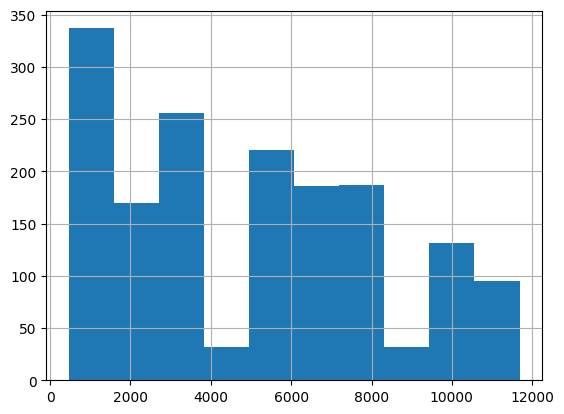

In [ ]:
data_df.근무일수.hist()

### Data_df 데이터 딕셔너리
제조 공정 데이터에 작업자 데이터를 병합

| 순번 |      칼럼명      | Non-Null Count |     Dtype      | Description |
|-----|-----------------|-----------------|----------------|----------------|
|  0  |      작업일자      |      1646      | datetime |
|  1  |        설비       |      1646      |     object     |LINE_A, LINE_B, LINE_C
|  2  |        근무조      |      1646      |     object     |야간, 주간
|  3  |        모델       |      1646      |     object     |니로, 소나타, 아반떼, 아이오닉, 투싼, 플러그인투싼
|  4  |       생산수량     |      1646      |      int64     |해당 근무조의 생산량
|  5  |        가동률      |      1646      |     float64    |전체 조업시간 중 설비가 실제로 가동된 가동시간의 비율
|  6  |       시간가동률    |      1646      |     float64    |부하시간 중 설비의 고장 정지, 기종 변경, 자재 품절, 유실 기간 등의 정지시간을 제외한 가동시간과 부하시간의 비율로, 설비가 정지 없이 가동되고 있는가를 나타내는 지표
|  7  |       성능가동률    |      1646      |     float64    |(생산량 x 이론적 단위생산시간)/가동시간 으로, 가동시간 중 설비 목표 성능을 발휘한 시간의 비율
|  8  |        불량수량     |      1646      |      int64     |
|  9  |         사번       |      1646      |      int64     |
| 10  |         성명       |      1646      |     object     |
| 11  |         나이       |      1646      |      int64     |
| 12  |         성별       |      1646      |     object     |남, 여
| 13  |        최종학력     |      1646      |     object     |고등학교, 전문대학, 대학
| 14  |        입사일자     |      1646      |     datetime     |연-월-일
| 15  |        근무일수     |      1646      |     float64     |입사일자부터 2022-12-31
| 16  |        경험     |      1646      |     object     |신입, 숙련자, 고인물


### nworkers_df 데이터 딕셔너리
작업자의 사번을 기준으로 제조 공정데이터를 그룹화후 평균을 낸 뒤 작업자 데이터에 병합.

| 순번 |   칼럼명   | Non-Null Count |     Dtype      | Description |
|-----|------------|-----------------|----------------|--------------|
|  0  |    사번     |       50        |     int64      |              |
|  1  |    성명     |       50        |     object     |              |
|  2  |    나이     |       50        |     int64      |              |
|  3  |    성별     |       50        |     object     |       남, 여       |
|  4  |   최종학력   |       50        |     object     |고등학교, 전문대학, 대학|
|  5  |   입사일자   |       50        |     object     |   연-월-일  |
|  6  |   생산수량   |       50        |    float64     |   작업자의 평균 생산 수량,  작업자의 총 생산수량 / 근무 참여 일수         |
|  7  |    가동률    |       50        |    float64     |   작업자의 평균 전체 조업시간 중 설비가 실제로 가동된 가동시간의 비율           |
|  8  |  시간가동률  |       50        |    float64     |  작업자의 평균 부하시간 중 설비의 고장 정지, 기종 변경, 자재 품절, 유실 기간 등의 정지시간을 제외한 가동시간과 부하시간의 비율로            |
|  9  |  성능가동률  |       50        |    float64     | 작업자의 평균 (생산량 x 이론적 단위생산시간)/가동시간 으로, 가동시간 중 설비 목표 성능을 발휘한 시간의 비율             |
| 10  |   불량수량   |       50        |    float64     |   평균불량수량           |
| 11  |        근무일수     |      1646      |     float64     |입사일자부터 2022-12-31
| 12  |        경험     |      1646      |     object     |신입, 숙련자, 고인물
| 13  |   불량률   |       50        |    float64     |    평균 불량수량/생산수량          |



# 3. EDA

In [ ]:
## 데이터 시각화 라이브러리 실행 시 출력되는 경고 메시지를 숨겨줍니다.
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import seaborn as sns
import matplotlib.pyplot as plt

### 3.1 산점도 시각화 (주의: 오래 걸림)

In [ ]:
# 큰 의미 없는 시각화

# sns.pairplot(data_df, hue='성별')
# plt.show()

In [ ]:
# sns.pairplot(data_df, hue='최종학력')
# plt.show()

In [ ]:
# sns.pairplot(data_df, hue='설비')
# plt.show()

In [ ]:
# sns.pairplot(data_df, hue='근무조')
# plt.show()

In [ ]:
# sns.pairplot(data_df, hue='모델')
# plt.show()

In [ ]:
# sns.pairplot(data_df, hue='경력')
# plt.show()

### 3.2 수치형 변수 시각화

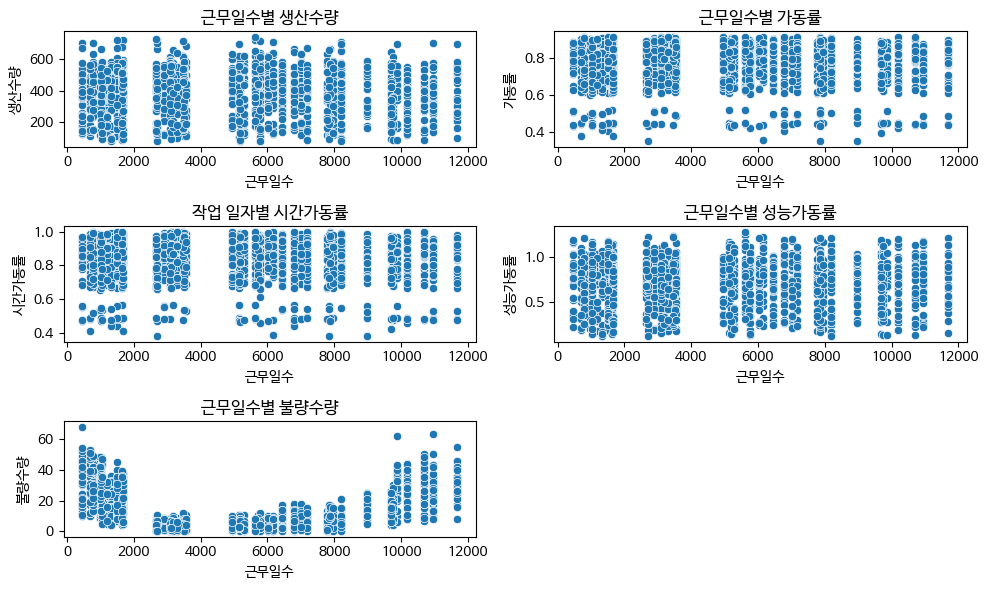

In [ ]:
# 작업 일자별로 생산수량, 가동률, 시간가동률, 성능가동률, 불량수량 시각화
plt.figure(figsize=(10, 6))

# 생산수량
plt.subplot(3, 2, 1)
sns.scatterplot(x='근무일수', y='생산수량', data=data_df)
plt.title('근무일수별 생산수량')

# 가동률
plt.subplot(3, 2, 2)
sns.scatterplot(x='근무일수', y='가동률', data=data_df)
plt.title('근무일수별 가동률')

# 시간가동률
plt.subplot(3, 2, 3)
sns.scatterplot(x='근무일수', y='시간가동률', data=data_df)
plt.title('작업 일자별 시간가동률')

# 성능가동률
plt.subplot(3, 2, 4)
sns.scatterplot(x='근무일수', y='성능가동률', data=data_df)
plt.title('근무일수별 성능가동률')

# 불량수량
plt.subplot(3, 2, 5)
sns.scatterplot(x='근무일수', y='불량수량', data=data_df)
plt.title('근무일수별 불량수량')

plt.tight_layout()
plt.show()

## 3.3 작업 일자별 수치형 데이터 시각화
시계열성 여부 판단시 사용

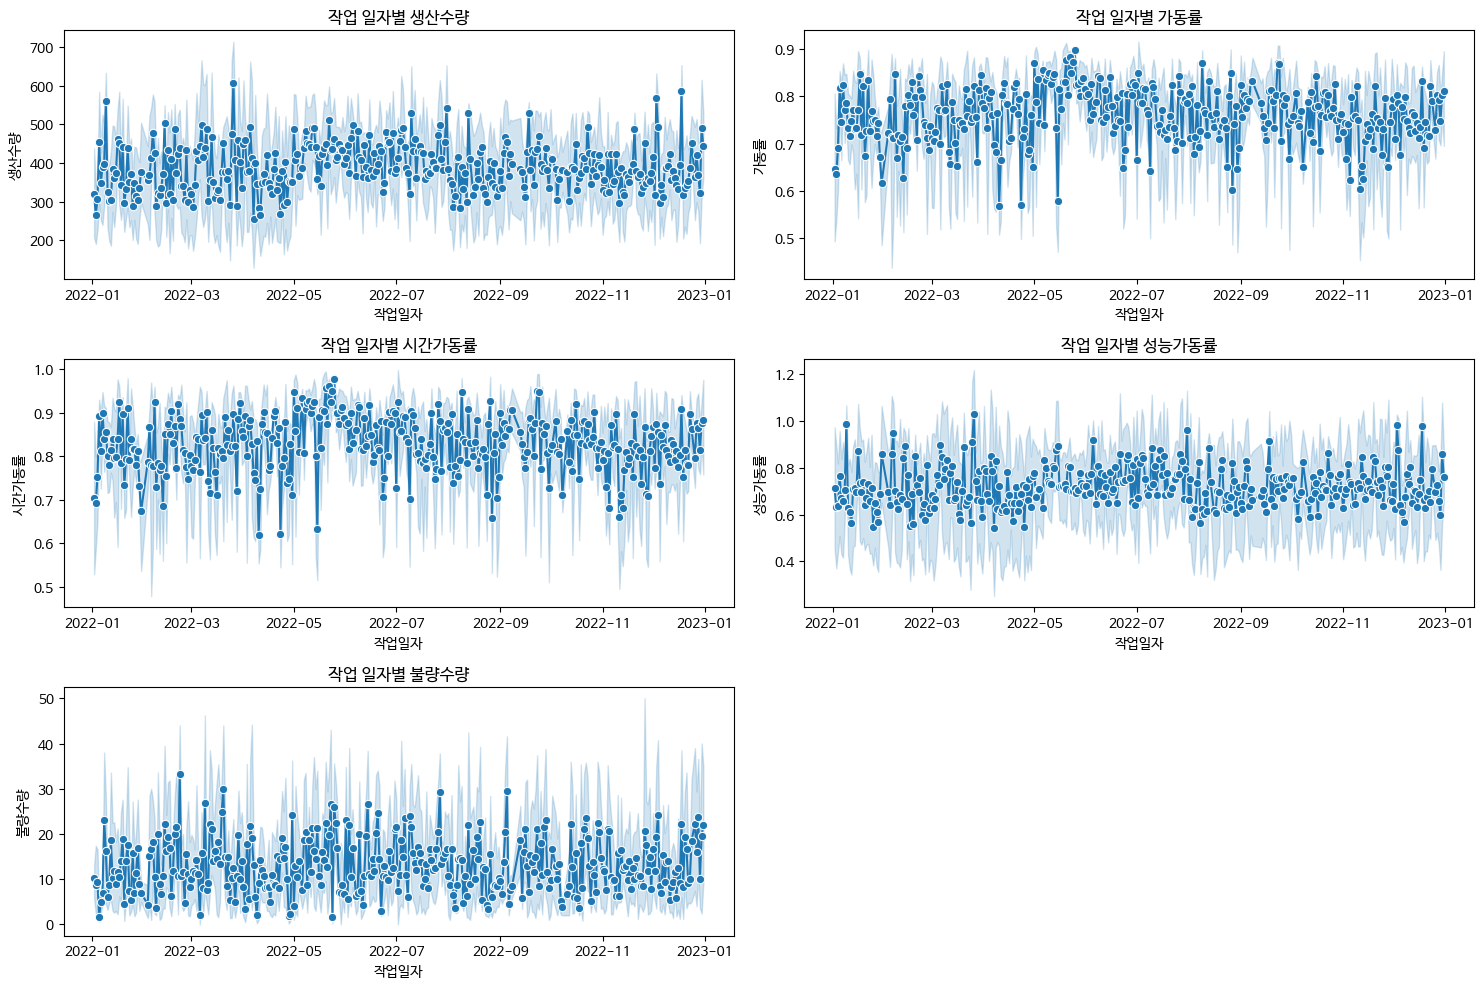

In [ ]:
# 작업 일자별로 생산수량, 가동률, 시간가동률, 성능가동률, 불량수량 시각화
plt.figure(figsize=(15, 10))

# 생산수량
plt.subplot(3, 2, 1)
sns.lineplot(x='작업일자', y='생산수량', data=data_df, marker='o')
plt.title('작업 일자별 생산수량')

# 가동률
plt.subplot(3, 2, 2)
sns.lineplot(x='작업일자', y='가동률', data=data_df, marker='o')
plt.title('작업 일자별 가동률')

# 시간가동률
plt.subplot(3, 2, 3)
sns.lineplot(x='작업일자', y='시간가동률', data=data_df, marker='o')
plt.title('작업 일자별 시간가동률')

# 성능가동률
plt.subplot(3, 2, 4)
sns.lineplot(x='작업일자', y='성능가동률', data=data_df, marker='o')
plt.title('작업 일자별 성능가동률')

# 불량수량
plt.subplot(3, 2, 5)
sns.lineplot(x='작업일자', y='불량수량', data=data_df, marker='o')
plt.title('작업 일자별 불량수량')

plt.tight_layout()
plt.show()

## 3.4 data_df 명목형 데이터에 대한 항목별 비율 확인

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 (data_df라고 가정)
# data_df = pd.read_csv("your_data.csv")

# 각 명목형 변수에 대한 비율 계산
gender_counts = data_df['성별'].value_counts()
education_counts = data_df['최종학력'].value_counts()
facility_counts = data_df['설비'].value_counts()
shift_counts = data_df['근무조'].value_counts()
model_counts = data_df['모델'].value_counts()

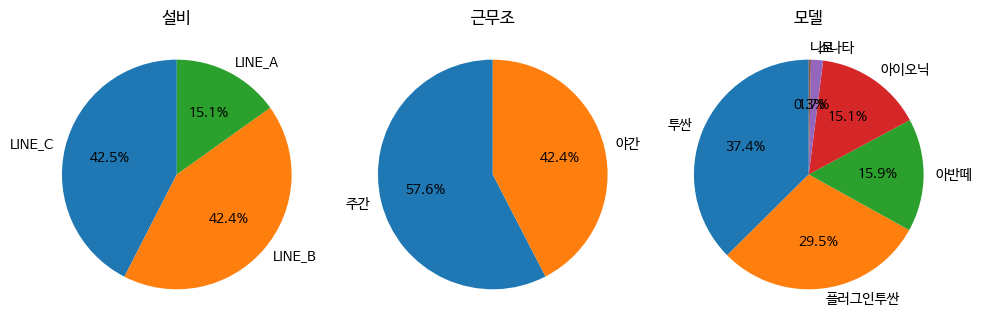

In [ ]:
# 파이 차트
plt.figure(figsize=(10, 12))


plt.subplot(1, 3, 1)
plt.pie(facility_counts, labels=facility_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('설비')

plt.subplot(1, 3, 2)
plt.pie(shift_counts, labels=shift_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('근무조')

plt.subplot(1, 3, 3)
plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('모델')

plt.tight_layout()
plt.show()

In [ ]:
# # 막대 그래프 의미없는 시각화
# plt.figure(figsize=(15, 12))

# plt.subplot(2, 3, 1)
# sns.countplot(x='성별', data=data_df)
# plt.title('성별')

# plt.subplot(2, 3, 2)
# sns.countplot(x='최종학력', data=data_df)
# plt.title('최종학력')

# plt.subplot(2, 3, 3)
# sns.countplot(x='설비', data=data_df)
# plt.title('설비')

# plt.subplot(2, 3, 4)
# sns.countplot(x='근무조', data=data_df)
# plt.title('근무조')

# plt.subplot(2, 3, 5)
# sns.countplot(x='모델', data=data_df)
# plt.title('모델')

# plt.tight_layout()
# plt.show()


## 3.5 nworker_df 명목형 데이터에 대한 항목별 비율 확인

In [ ]:
# 각 명목형 변수에 대한 비율 계산
nw_gender_counts = nworker_df['성별'].value_counts()
nw_education_counts = nworker_df['최종학력'].value_counts()

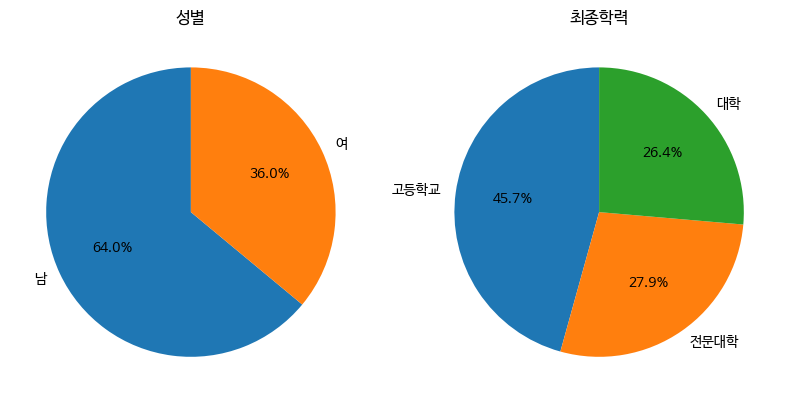

In [ ]:
# 파이 차트
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=nw_gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('성별')

plt.subplot(1, 2, 2)
plt.pie(education_counts, labels=nw_education_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('최종학력')


plt.tight_layout()
plt.show()

In [ ]:
# # 막대 그래프 의미없는 시각화
# plt.figure(figsize=(8, 6))

# plt.subplot(1, 2, 1)
# sns.countplot(x='성별', data=nworker_df)
# plt.title('성별')

# plt.subplot(1, 2, 2)
# sns.countplot(x='최종학력', data=nworker_df)
# plt.title('최종학력')

# plt.tight_layout()
# plt.show()

## 3.6 월간 수치형 데이터 시각화 by 명목형 데이터

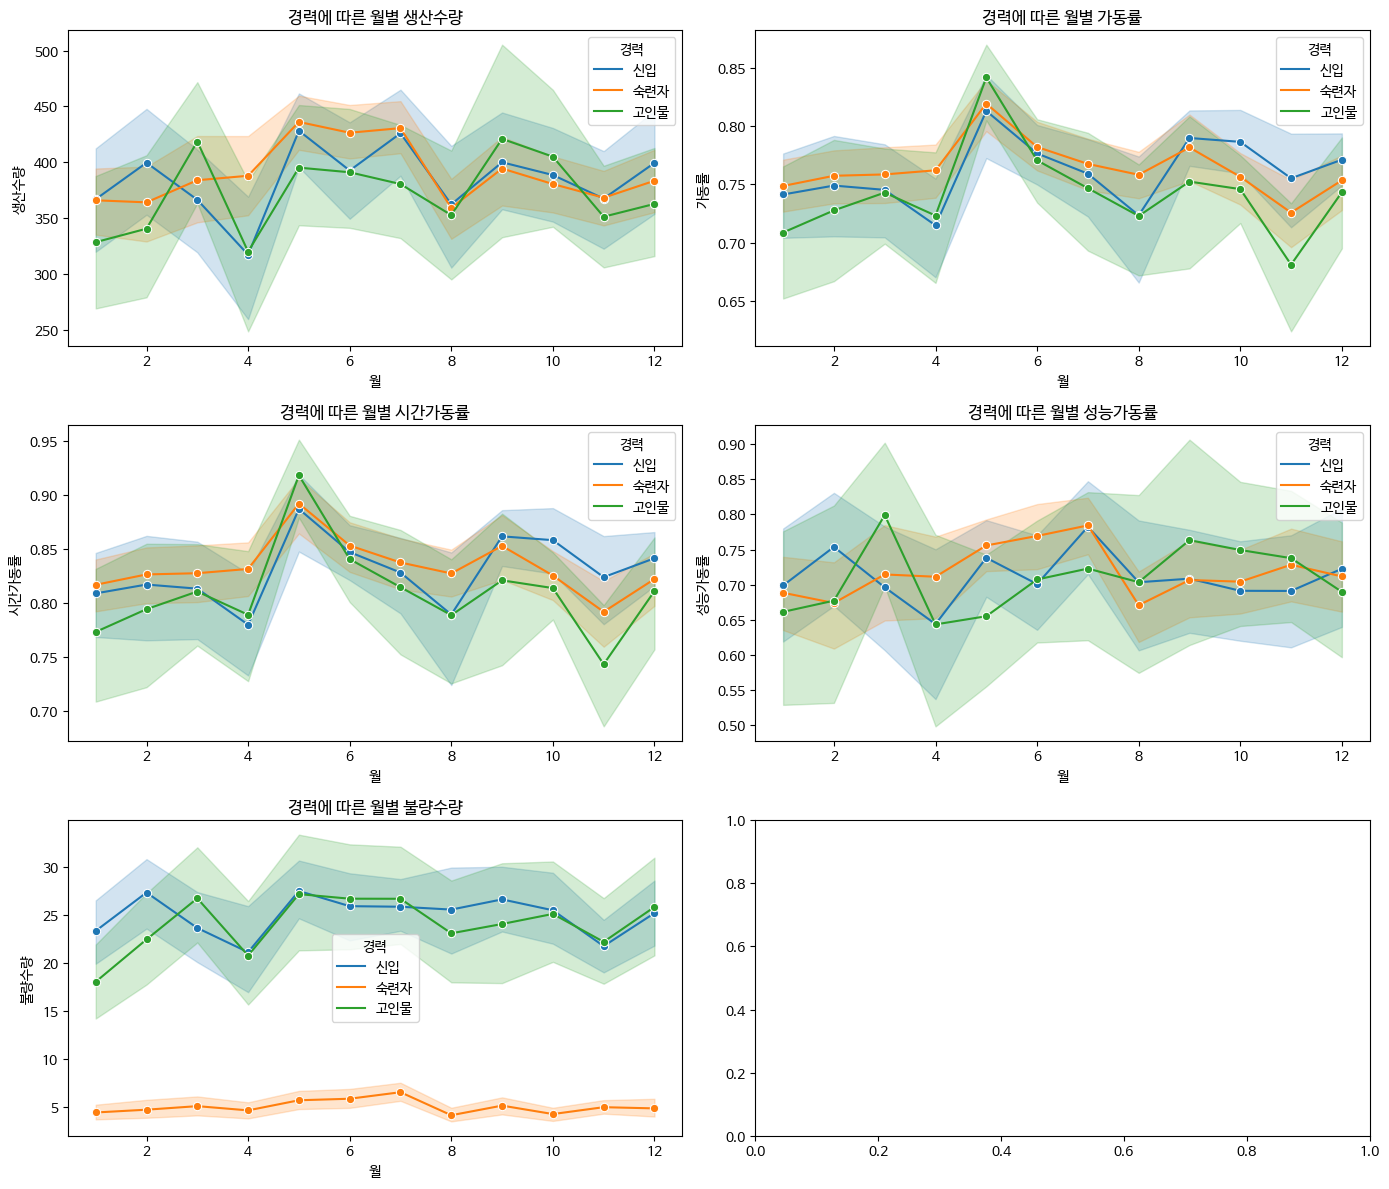

In [ ]:
# 월간 생산량 및 경력 시각화 함수
def visualize_cumulative_production_by_year(data_df, colname, ax=None):
    # '작업일자' 열을 datetime 형식으로 변환
    data_df['작업일자'] = pd.to_datetime(data_df['작업일자'])

    # 월별 생산량 계산
    data_df['월'] = data_df['작업일자'].dt.month
    data_df['연도'] = data_df['작업일자'].dt.year


    # 경력에 따른 월별 생산량 시각화
    if ax is None:
        plt.figure(figsize=(12, 8))
        sns.lineplot(x='월', y=colname, data=data_df, hue='경력', marker='o')
        plt.title(f'경력에 따른 월별 {colname}')
        plt.xlabel('월')
        plt.ylabel(colname)
        plt.legend(title='경력')
        plt.show()
    else:
        sns.lineplot(x='월', y=colname, data=data_df, hue='경력', marker='o', ax=ax)
        ax.set_title(f'경력에 따른 월별 {colname}')
        ax.set_xlabel('월')
        ax.set_ylabel(colname)
        ax.legend(title='경력')

# 시각화 함수 수정
def visualize_cumulative_metrics_subplot(data_df, colnames):
    num_metrics = len(colnames)
    fig, axes = plt.subplots(nrows=num_metrics // 2 + num_metrics % 2, ncols=2, figsize=(14, 4 * (num_metrics // 2 + num_metrics % 2)))

    for i, colname in enumerate(colnames):
        row = i // 2
        col = i % 2
        visualize_cumulative_production_by_year(data_df, colname, ax=axes[row, col])

    plt.tight_layout()
    plt.show()

# 시각화 함수 호출
colnames = ['생산수량', '가동률', '시간가동률', '성능가동률', '불량수량']
visualize_cumulative_metrics_subplot(data_df, colnames)

## 3.7 월간 누적 수치형 데이터 시각화 by 명목형 데이터

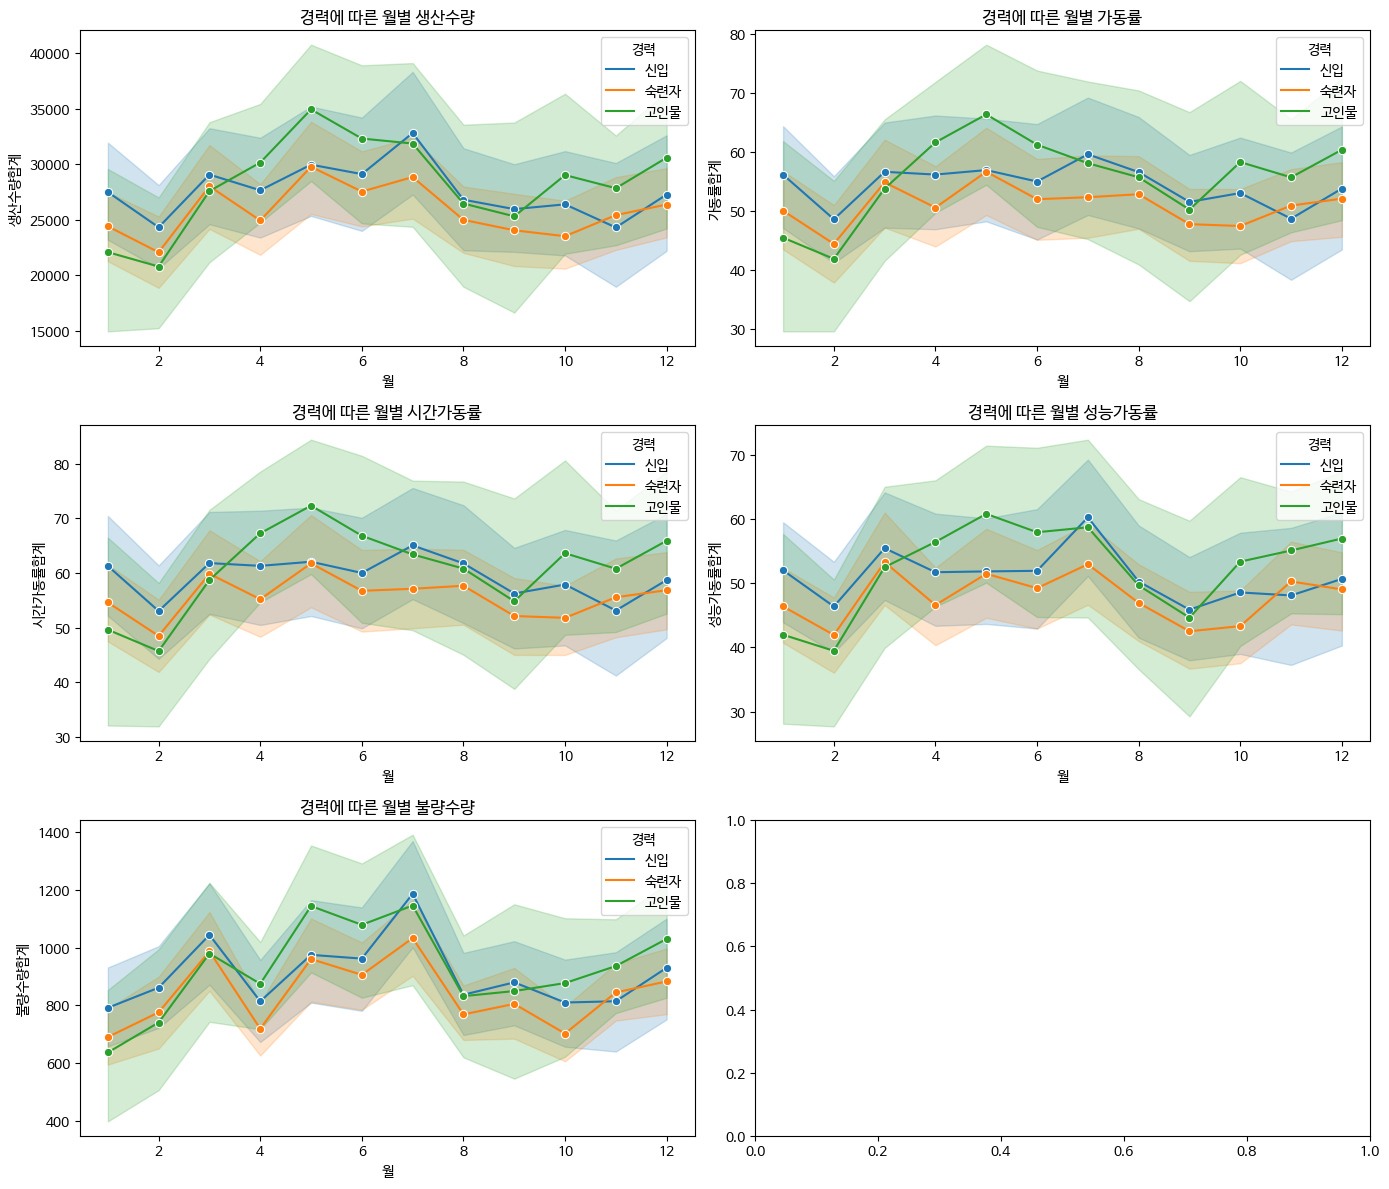

In [ ]:
# 연간 누적 생산량 및 경력 시각화 함수
def visualize_cumulative_production_by_year(data_df, colname, ax=None):
    # '작업일자' 열을 datetime 형식으로 변환
    data_df['작업일자'] = pd.to_datetime(data_df['작업일자'])

    # 월별 누적 생산량 계산
    data_df['월'] = data_df['작업일자'].dt.month
    data_df['연도'] = data_df['작업일자'].dt.year
    colsum = f'{colname}합계'
    data_df[colsum] = data_df.groupby(['연도', '월'])[colname].cumsum()

    # 경력에 따른 월별 누적 생산량 시각화
    if ax is None:
        plt.figure(figsize=(12, 8))
        sns.lineplot(x='월', y=colsum, data=data_df, hue='경력', marker='o')
        plt.title(f'경력에 따른 월별 {colname}')
        plt.xlabel('월')
        plt.ylabel(colsum)
        plt.legend(title='경력')
        plt.show()
    else:
        sns.lineplot(x='월', y=colsum, data=data_df, hue='경력', marker='o', ax=ax)
        ax.set_title(f'경력에 따른 월별 {colname}')
        ax.set_xlabel('월')
        ax.set_ylabel(colsum)
        ax.legend(title='경력')

# 시각화 함수 수정
def visualize_cumulative_metrics_subplot(data_df, colnames):
    num_metrics = len(colnames)
    fig, axes = plt.subplots(nrows=num_metrics // 2 + num_metrics % 2, ncols=2, figsize=(14, 4 * (num_metrics // 2 + num_metrics % 2)))

    for i, colname in enumerate(colnames):
        row = i // 2
        col = i % 2
        visualize_cumulative_production_by_year(data_df, colname, ax=axes[row, col])

    plt.tight_layout()
    plt.show()

# 시각화 함수 호출
colnames = ['생산수량', '가동률', '시간가동률', '성능가동률', '불량수량']
visualize_cumulative_metrics_subplot(data_df, colnames)

### 3.8 data_df 명목형 변수 시각화

In [ ]:
def gen_box_plot(x, y_list, data):
    """
    박스플롯을 생성하는 함수

    Parameters:
    - x: str, x 축에 사용할 칼럼명
    - y_list: list, y 축에 사용할 칼럼명들이 담긴 리스트
    - data: DataFrame, 분석할 데이터프레임

    Returns:
    - None
    """
    num_plots = len(y_list)
    rows = num_plots // 3 + (num_plots % 3 > 0)

    plt.figure(figsize=(15, 5 * rows))

    for i, y in enumerate(y_list, 1):
        plt.subplot(rows, 3, i)
        sns.boxplot(x=x, y=y, data=data)
        plt.title(f'{x}에 따른 {y}')

    plt.tight_layout()
    plt.show()

In [ ]:
# gen_box_plot(x='성별', y_list=['생산수량', '가동률', '시간가동률', '성능가동률', '불량수량', '나이'], data=data_df)

In [ ]:
# gen_box_plot(x='최종학력', y_list=['생산수량', '가동률', '시간가동률', '성능가동률', '불량수량', '나이'], data=data_df)

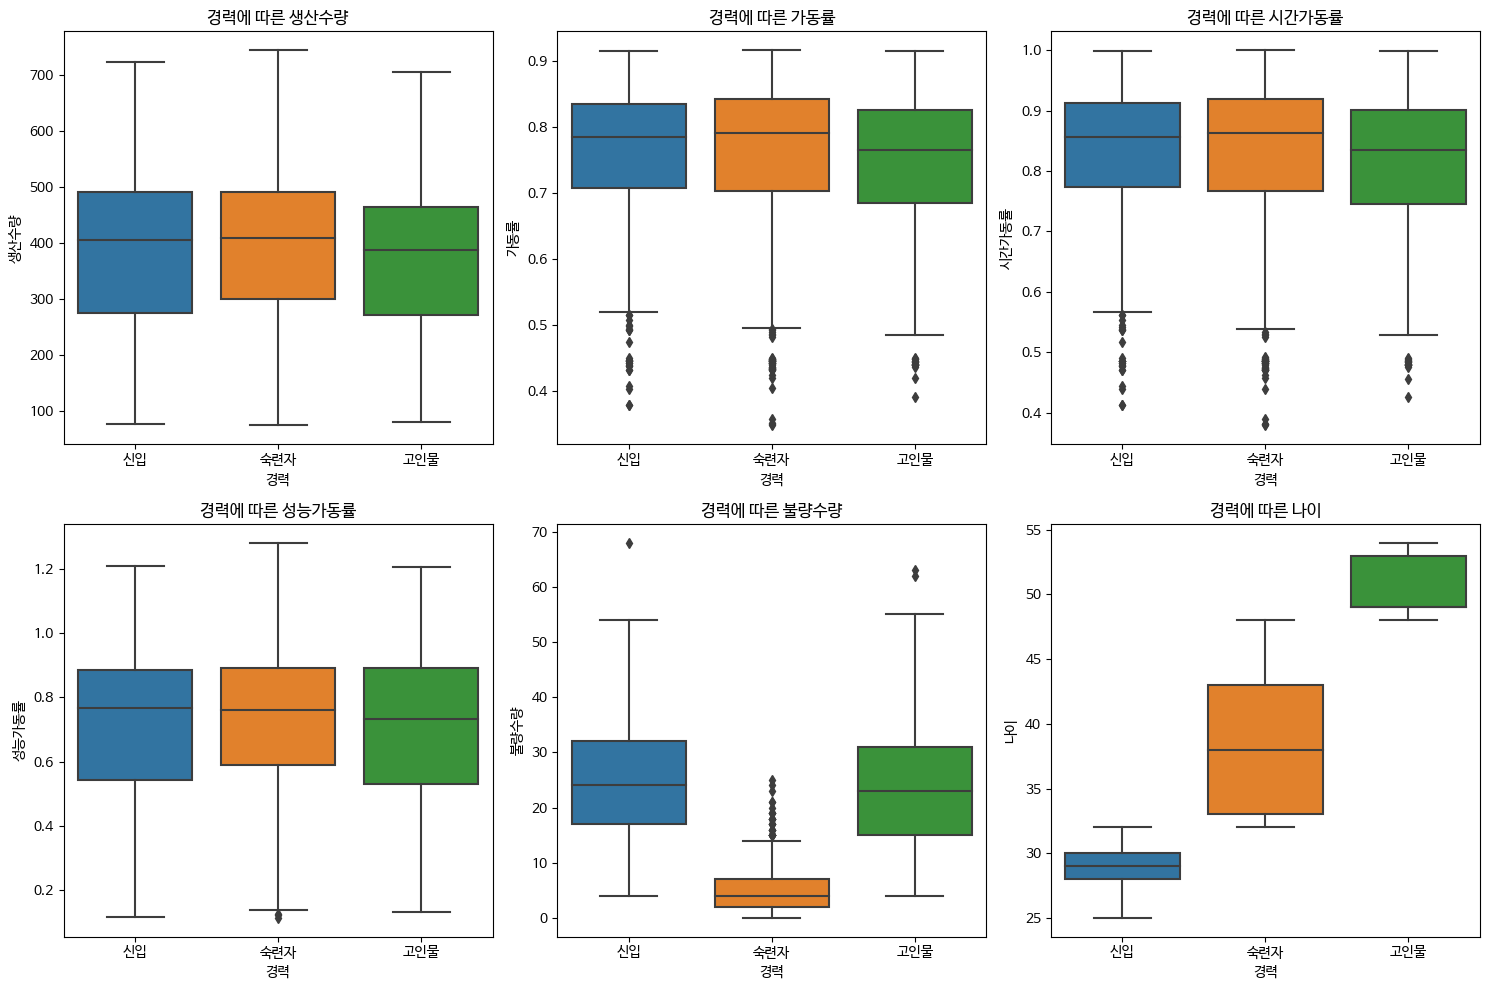

In [ ]:
gen_box_plot(x='경력', y_list=['생산수량', '가동률', '시간가동률', '성능가동률', '불량수량', '나이'], data=data_df)

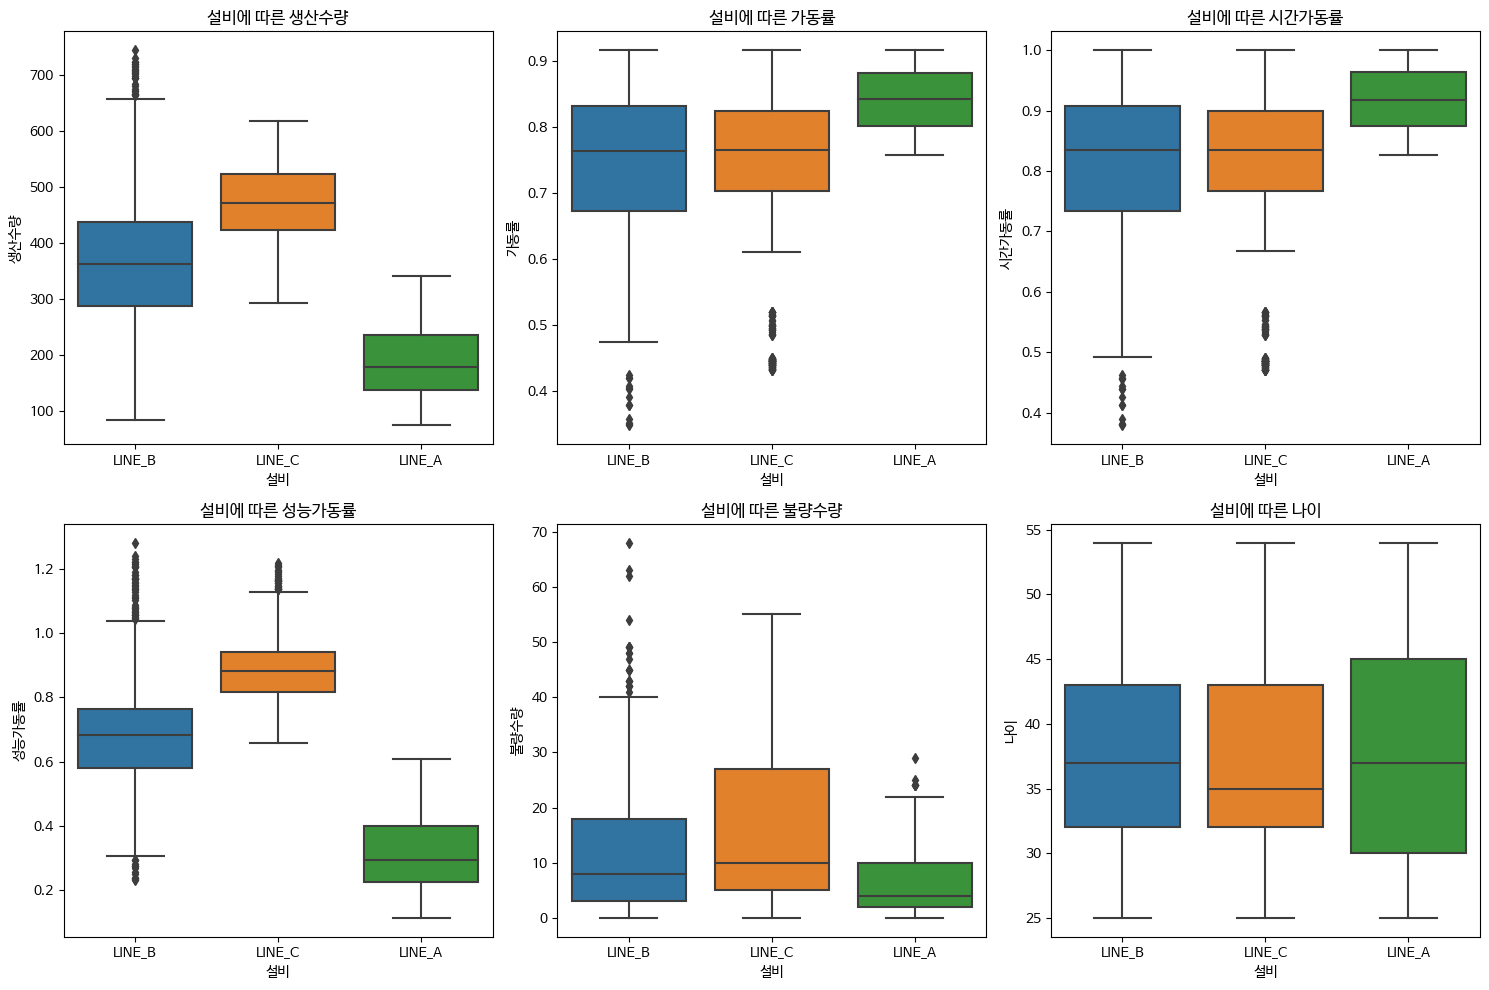

In [ ]:
gen_box_plot(x='설비', y_list=['생산수량', '가동률', '시간가동률', '성능가동률', '불량수량', '나이'], data=data_df)

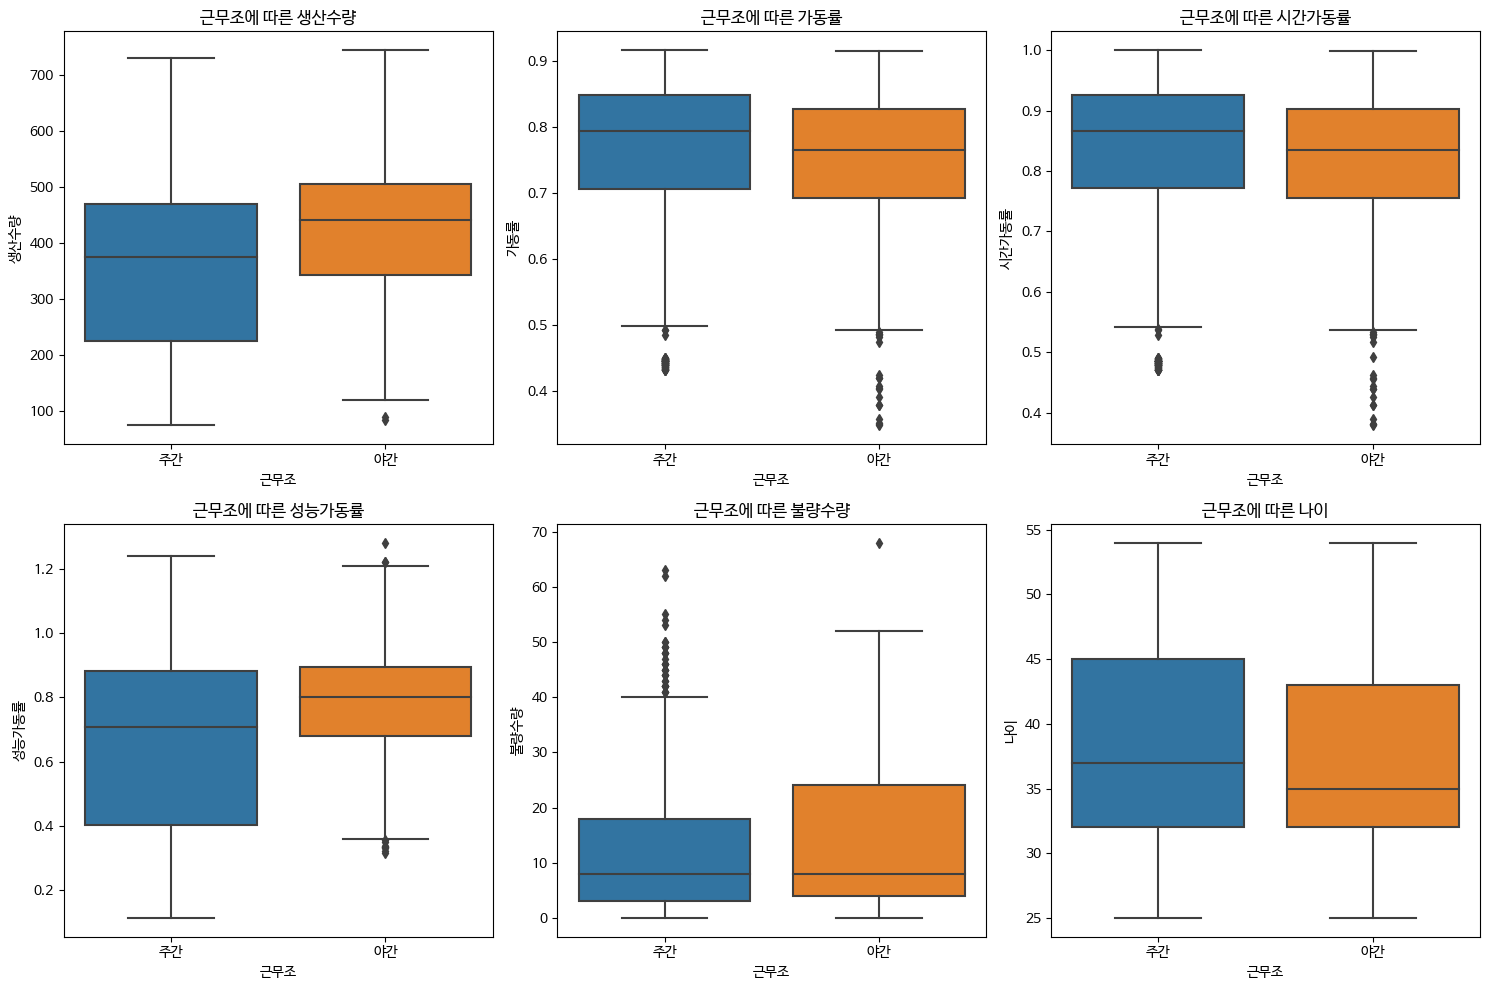

In [ ]:
gen_box_plot(x='근무조', y_list=['생산수량', '가동률', '시간가동률', '성능가동률', '불량수량', '나이'], data=data_df)

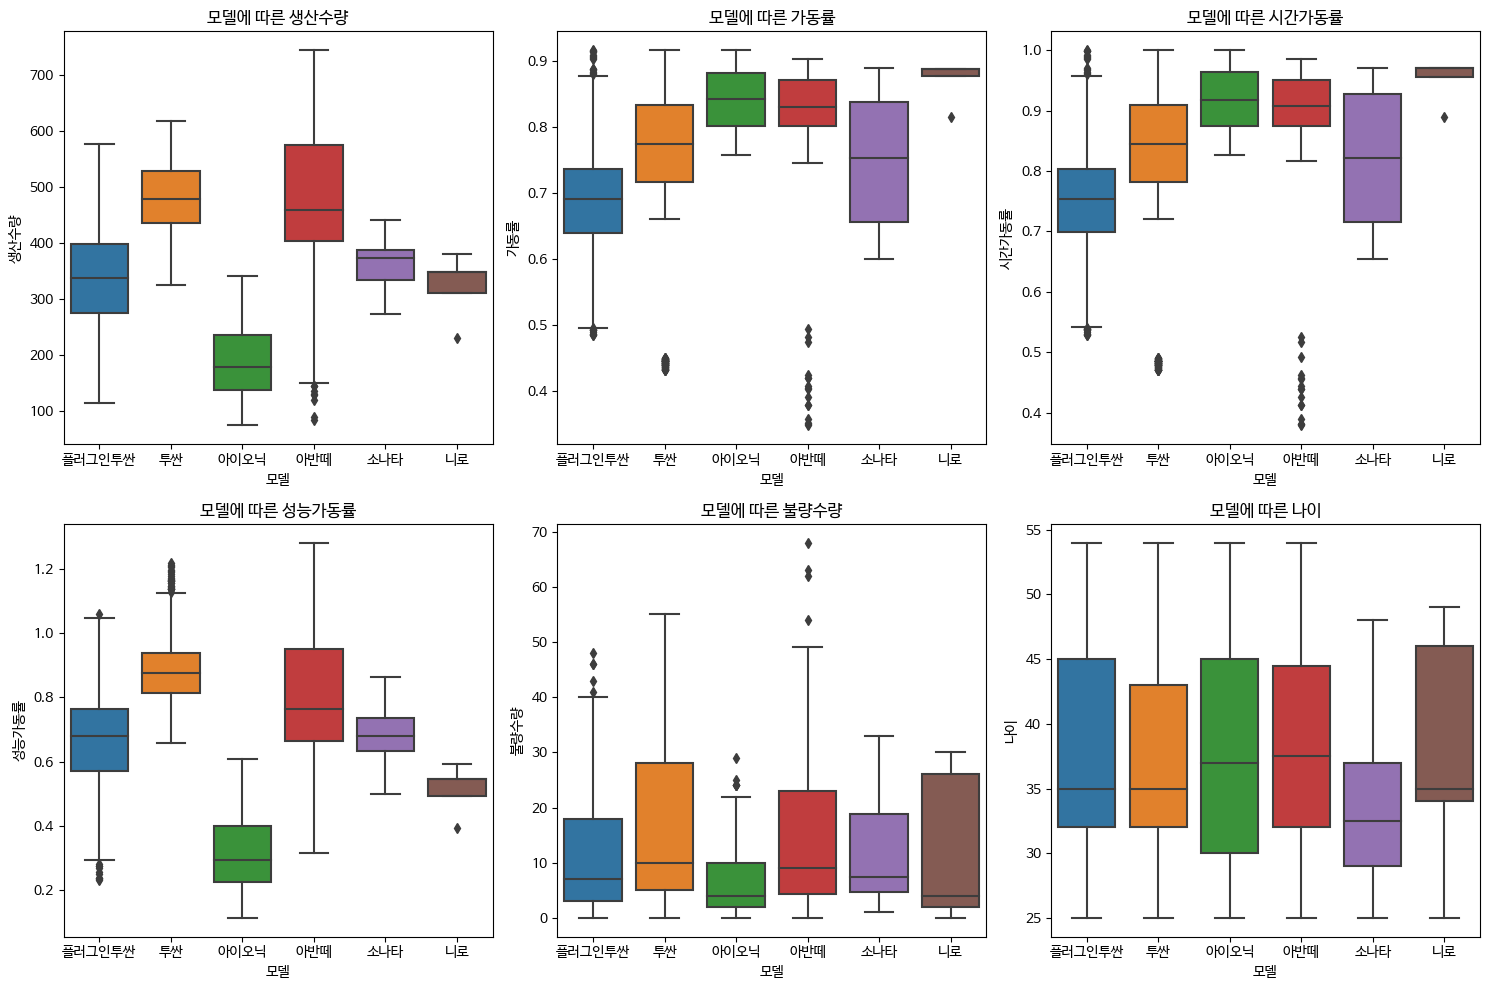

In [ ]:
gen_box_plot(x='모델', y_list=['생산수량', '가동률', '시간가동률', '성능가동률', '불량수량', '나이'], data=data_df)

In [ ]:
# gen_box_plot(x='경력', y_list=['생산수량', '가동률', '시간가동률', '성능가동률', '불량수량', '나이'], data=data_df)

## 3.9 nworker_df 명목형 데이터 시각화

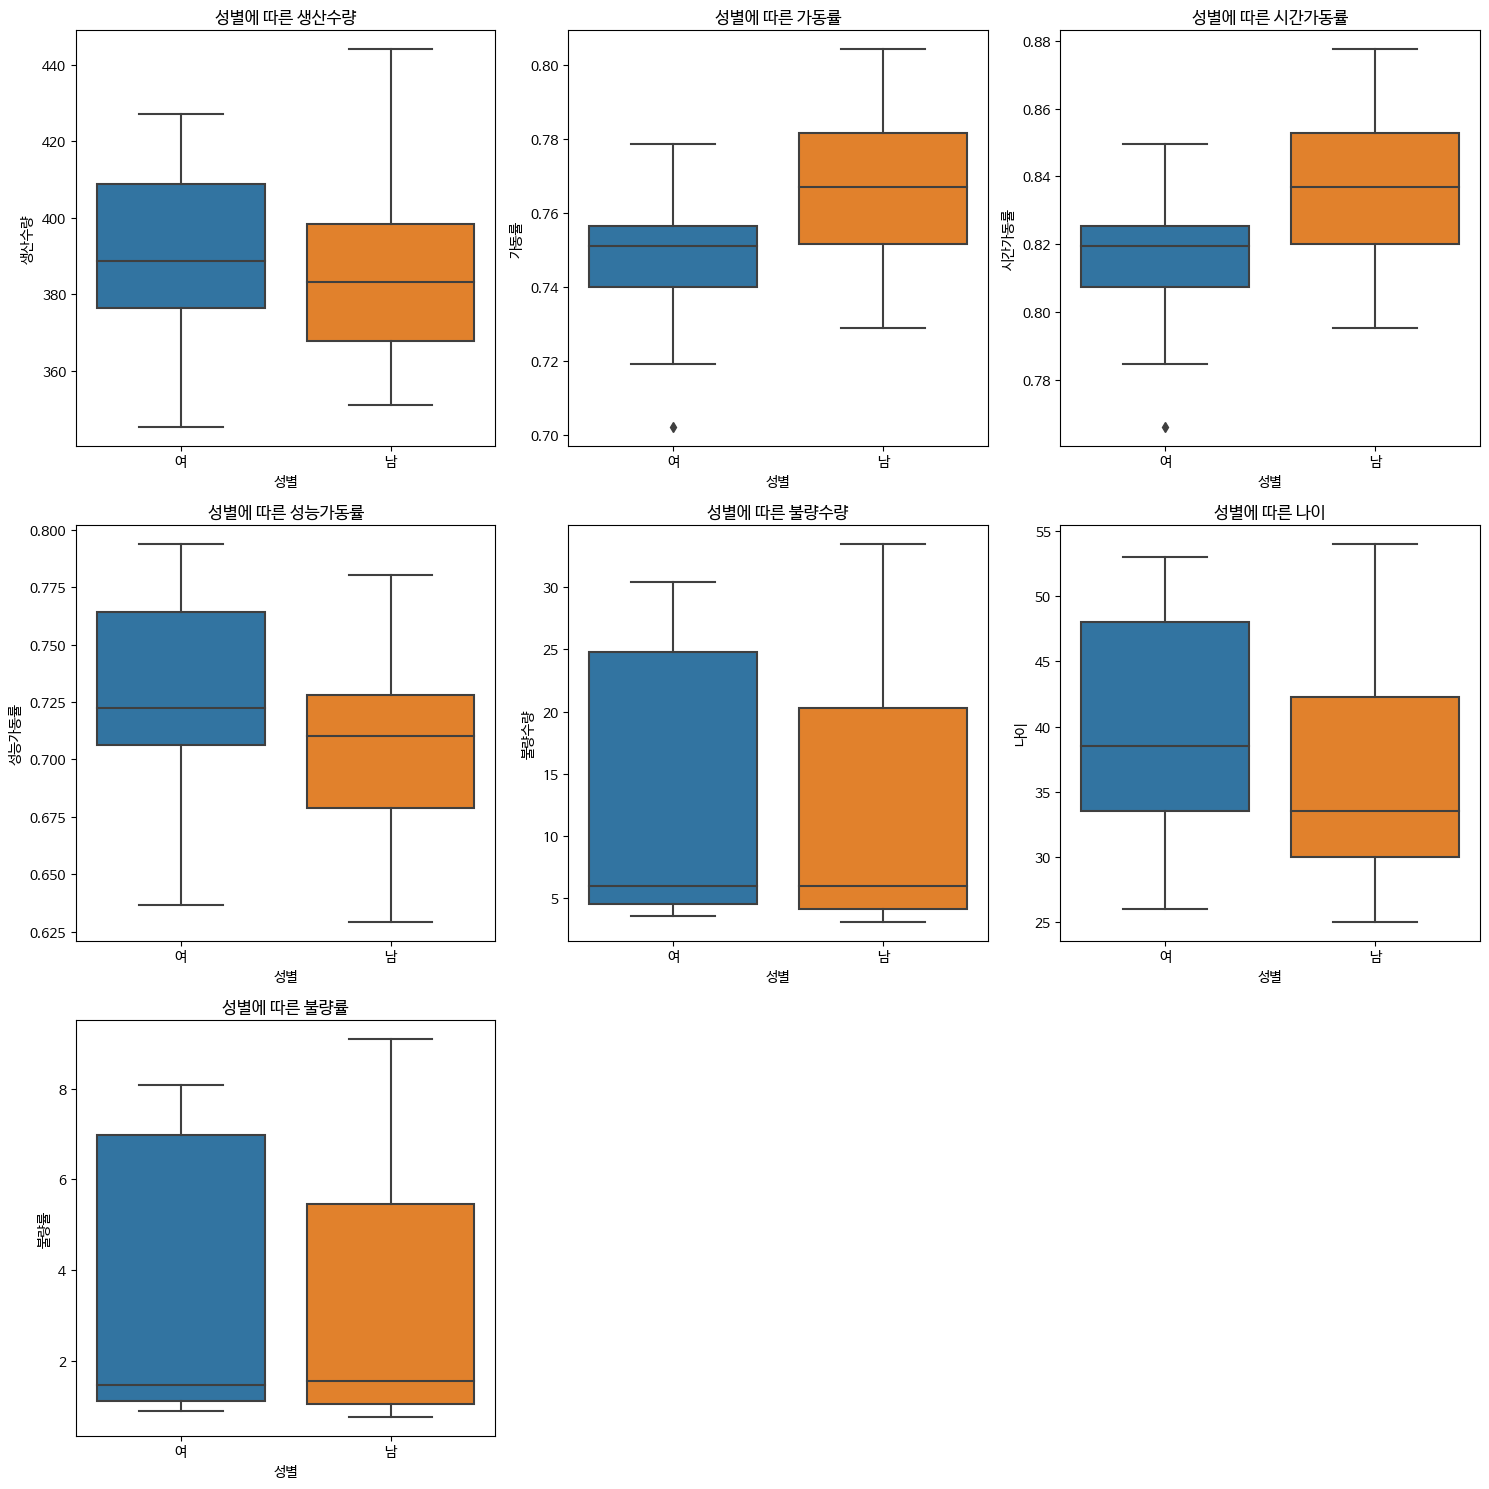

In [ ]:
gen_box_plot(x='성별', y_list=['생산수량', '가동률', '시간가동률', '성능가동률', '불량수량', '나이', '불량률'], data=nworker_df)

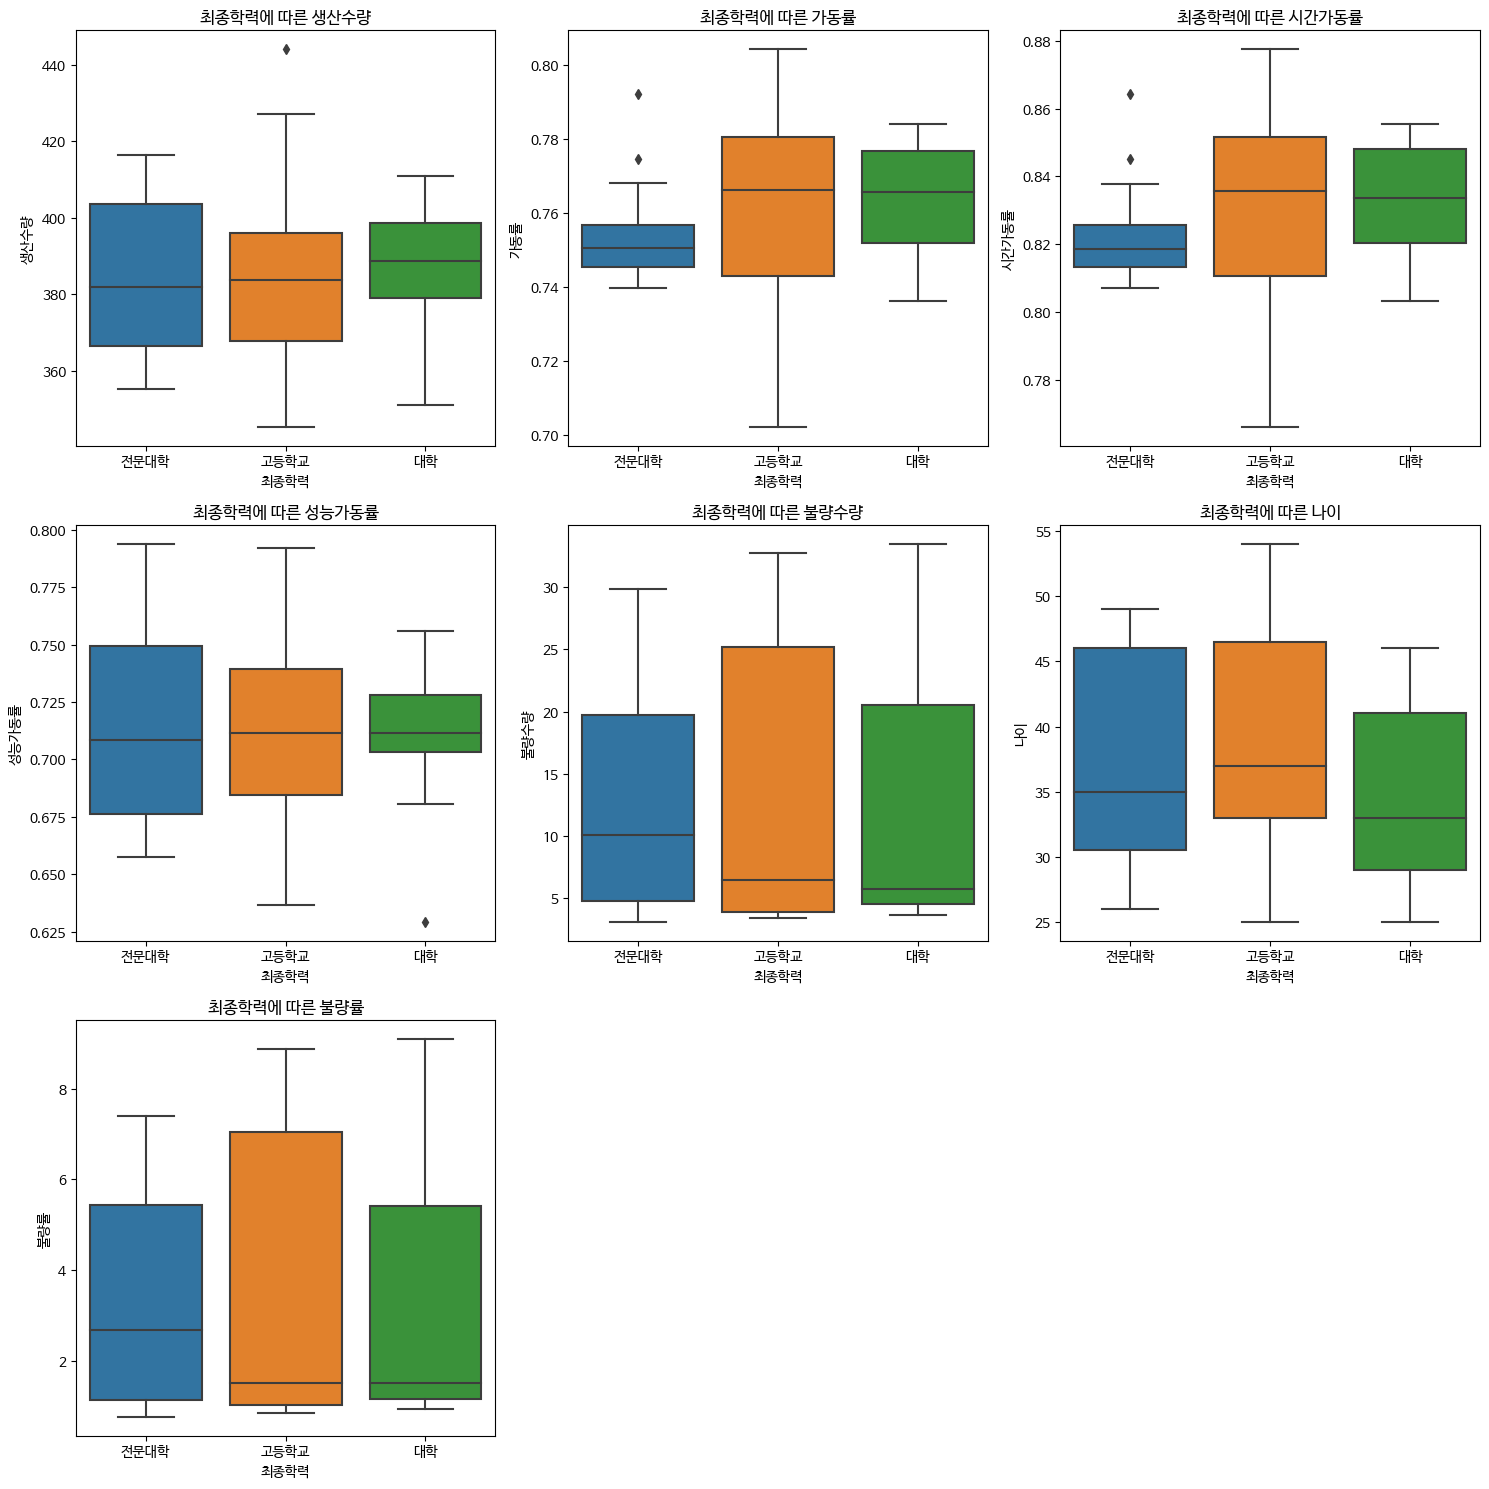

In [ ]:
gen_box_plot(x='최종학력', y_list=['생산수량', '가동률', '시간가동률', '성능가동률', '불량수량', '나이', '불량률'], data=nworker_df)

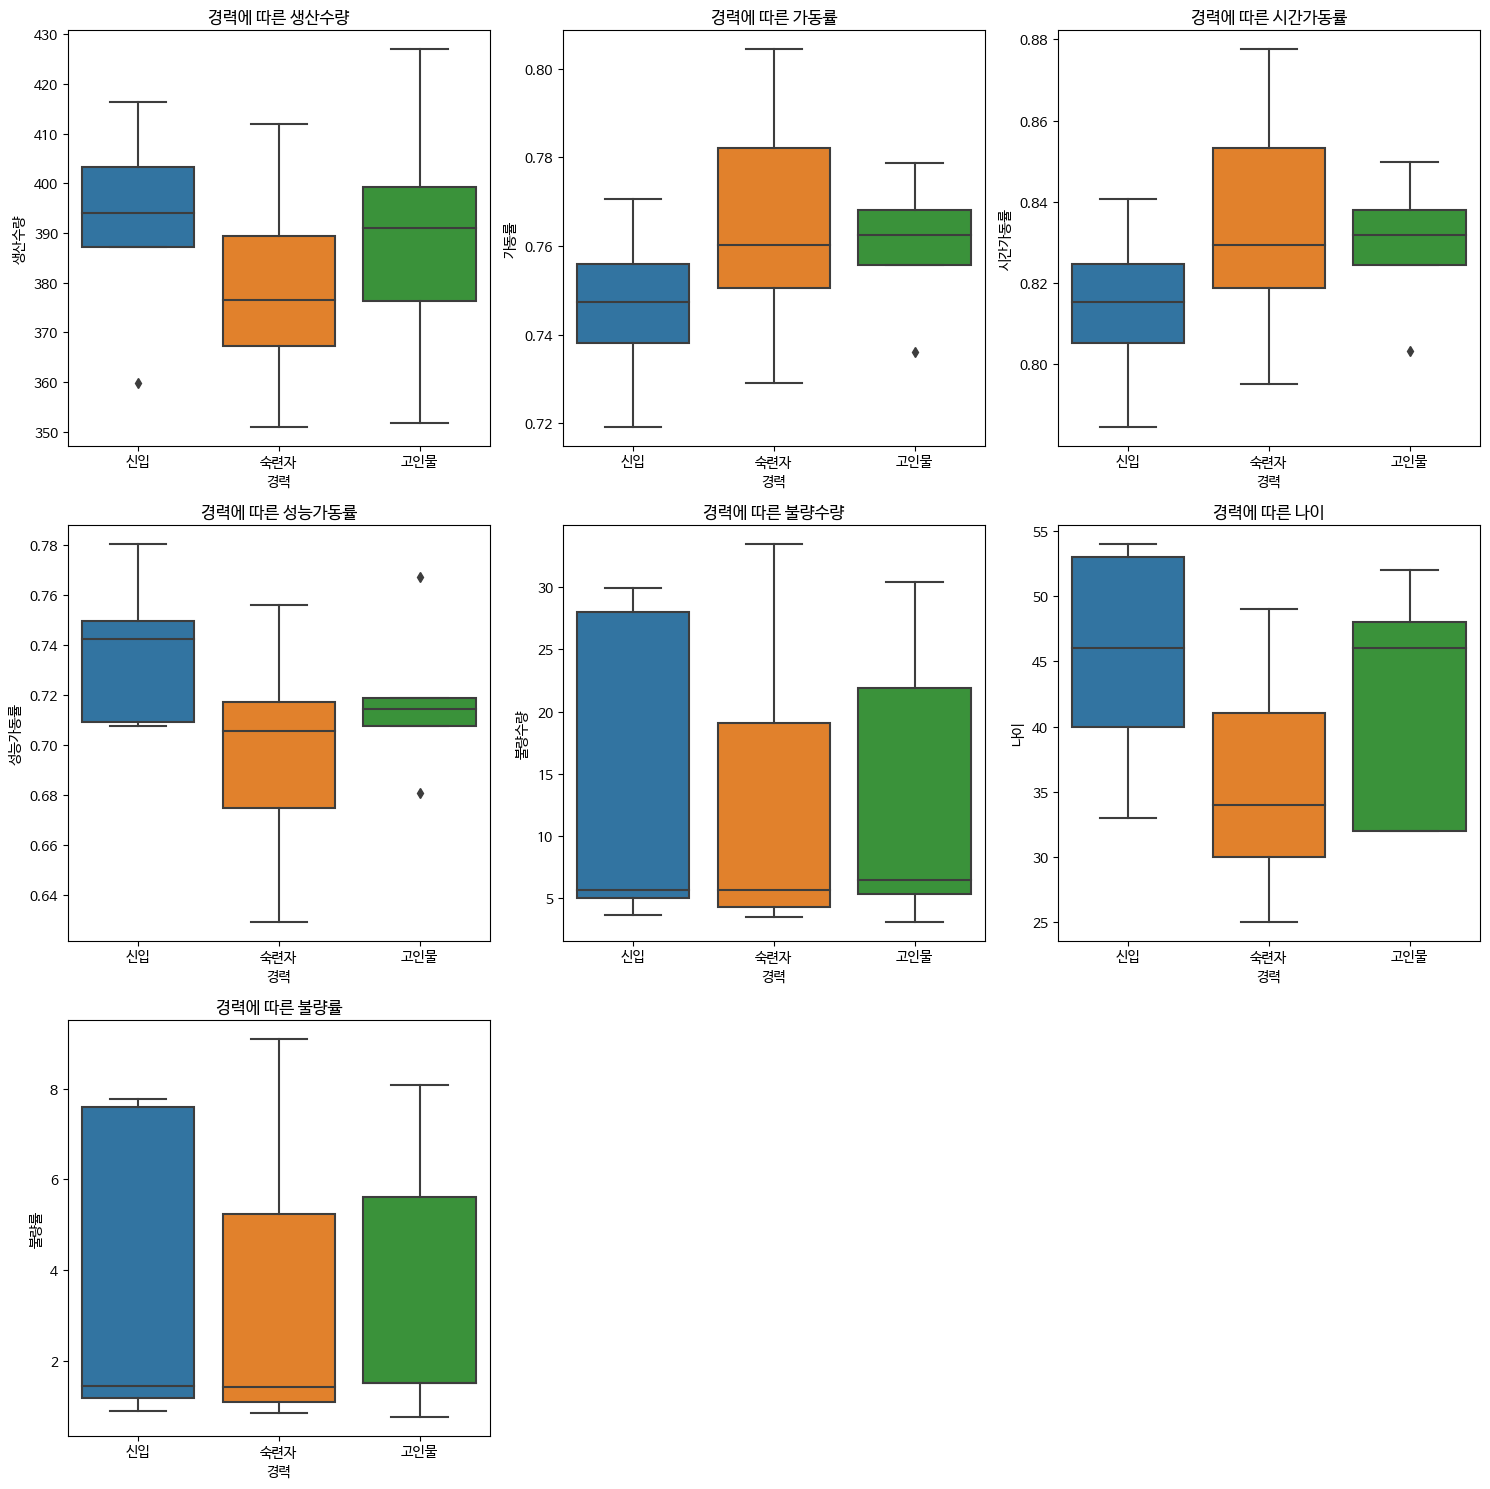

In [ ]:
gen_box_plot(x='경력', y_list=['생산수량', '가동률', '시간가동률', '성능가동률', '불량수량', '나이', '불량률'], data=nworker_df)

<Axes: >

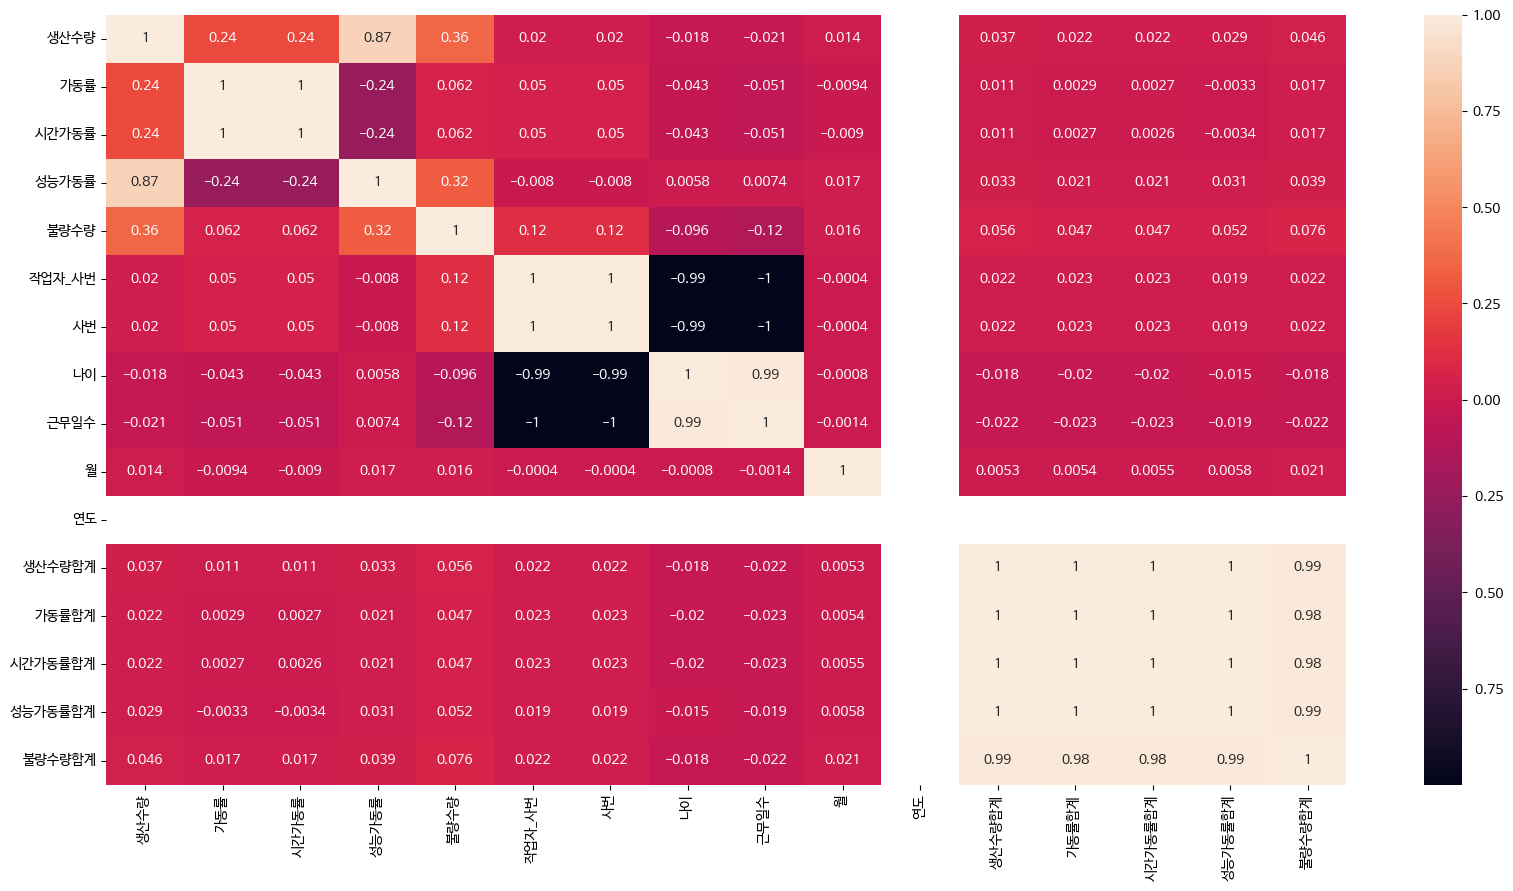

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_df.corr(), annot=True)

<Axes: >

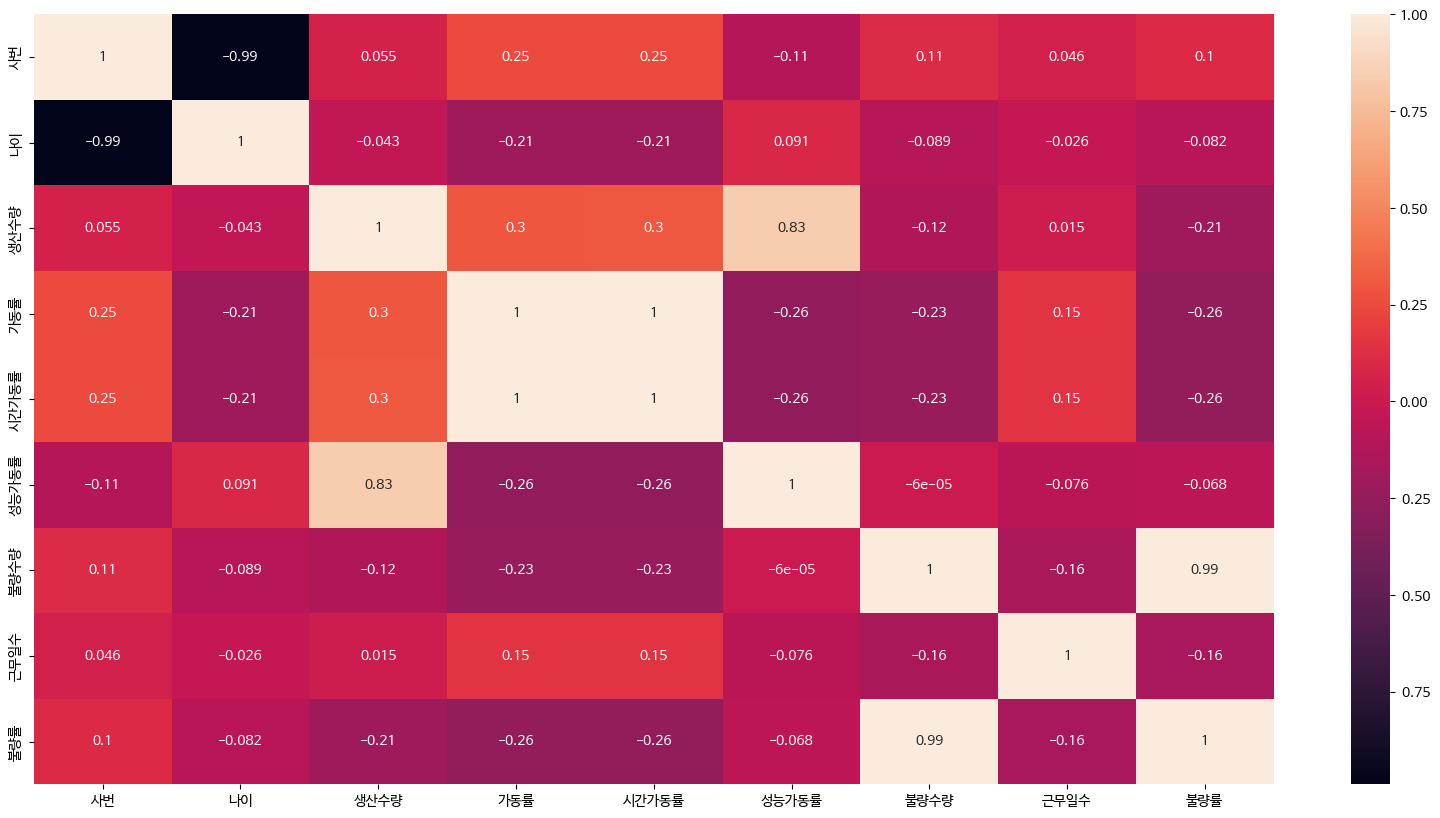

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(nworker_df.corr(), annot=True)

## 가설
1. 성별에 따라 가동률의 평균이 다르다.
    <br> -> 3.9번 성별에 따른 가동률 박스 플롯으로 성별에 따라 가동률의 차이가 존재함을 확인함

2. 경력에 따라 생산수량의 평균이 다르다.
    <br> -> 3.9번 경력에 따른 생산수량 박스 플롯으로 경력에 따라 생산수량의 차이가 존재함을 확인함

3. 경력에 따라 성능가동률의 평균이 다르다.
    <br> -> 3.9번 경력에 따른 성능가동률 박스 플롯으로 경력에 따라 성능가동률의 차이가 존재함을 확인함

4. 설비에 따라 성능가동률의 평균이 다르다.
    <br> -> 3.8번 설비에 따른 성능가동률 박스 플롯으로 설비에 따라 성능가동률의 차이가 존재함을 확인함
<br>...

# 4. 데이터 분석

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

**모든 가설 검정의 유의수준은 0.05로 설정한다.**

## 가설 1 검정
$ H_{0} $: $ 가동률 \mu_남 =  가동률 \mu_여 $ <br>
$ H_{1} $: $ 가동률 \mu_남 > 가동률 \mu_여 $

In [ ]:
male_gaodong = nworker_df[nworker_df['성별'] == '남']['가동률'].dropna()
female_gaodong = nworker_df[nworker_df['성별'] == '여']['가동률'].dropna()

# t-검정 수행
t_stat, p_value = ttest_ind(male_gaodong, female_gaodong, equal_var=False, alternative ='greater')
# 결과 출력
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 3.0233464881638348
p-value: 0.0023563683665078685


분산 분석 결과 P-value가 유의수준보다 작으므로 귀무가설을 기각한다.

## 가설 2 검정
$ H_{0} $: 서로 다른 경력의 생산수량의 평균이 모두 같다 <br>
$ H_{1} $: 적어도 하나의 경력의 생산수량의 평균은 다르다

In [ ]:
model = ols('생산수량 ~ C(경력)', nworker_df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(경력),2.0,881.091733,440.545867,1.070125,0.355697
Residual,30.0,12350.314659,411.677155,NaN,NaN


분산 분석 결과 P-value가 유의수준보다 크기 때문에 귀무가설을 채택한다.

## 가설 3 검정
$ H_{0} $: 서로 다른 경력의 성능가동률의 평균이 모두 같다 <br>
$ H_{1} $: 적어도 하나의 경력의 성능가동률의 평균은 다르다

In [ ]:
model = ols('성능가동률 ~ C(경력)', nworker_df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(경력),2.0,0.006952,0.003476,3.841888,0.032697
Residual,30.0,0.027143,0.000905,NaN,NaN


분산 분석 결과 P-value가 유의수준보다 작으므로 귀무가설을 기각한다.

## 가설 4 검정
$ H_{0} $: 서로 다른 설비의 성능가동률의 평균이 모두 같다 <br>
$ H_{1} $: 적어도 하나의 설비의 성능가동률의 평균은 다르다


In [ ]:
model = ols('성능가동률 ~ C(설비)', data_df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(설비),2.0,63.239777,31.619888,1417.235275,0.0
Residual,1643.0,36.656918,0.022311,NaN,NaN


분산 분석 결과 P-value가 유의수준보다 작으므로 귀무가설을 기각한다.


## (번외) 가설 5 검정
생산수량, 가동률, 시간가동률, 성능가동률 각각의 상관관계 검정 <br>
(생산수량-가동률, 생산수량-시간가동률, 생산수량-성능가동률, 가동률-시간가동률, 가동률-성능가동률, 시간가동률-성능가동률)

$ H_{0} $: $\rho = 0 $ <br>
$ H_{1} $: $\rho \neq 0 $

In [ ]:
import numpy as np
tar_data_df = data_df[['생산수량','가동률', '시간가동률','성능가동률']]
tar_data_df_corr = tar_data_df.corr()
result = pd.DataFrame(data = np.zeros((tar_data_df.shape[1], tar_data_df.shape[1])), index=tar_data_df_corr.index, columns=tar_data_df_corr.columns)
for i in range(len(result)):
  for j in range(i, len(result)):
    _, pval = stats.pearsonr(tar_data_df.iloc[:, i], tar_data_df.iloc[:, j])
    result.iloc[i, j] = pval
    result.iloc[j, i] = pval
result

,생산수량,가동률,시간가동률,성능가동률
생산수량,0.000000e+00,2.232208e-22,2.400835e-22,0.000000e+00
가동률,2.232208e-22,0.000000e+00,0.000000e+00,3.969185e-23
시간가동률,2.400835e-22,0.000000e+00,0.000000e+00,3.456287e-23
성능가동률,0.000000e+00,3.969185e-23,3.456287e-23,0.000000e+00


생산수량-가동률, 생산수량-시간가동률, 생산수량-성능가동률, 가동률-시간가동률, 가동률-성능가동률, 시간가동률-성능가동률, 총 6 항목에 대한 상관관계 유/무에 대한 가설 검정을 실시하였다.<br>

모든 항목의 검정에서 p-value가 유의수준보다 작게 나왔으며, 대립가설을 기각한다. 이를 통해 해당 4항목들이 서로 상관관계를 가지있음을 확인할 수 있다.

## (번외) 가설 6 검정
$ H_{0} $: 서로 다른 경력의 시간가동률의 평균이 모두 같다 <br>
$ H_{1} $: 적어도 하나의 경력의 시간가동률의 평균은 다르다


In [ ]:
model = ols('시간가동률 ~ C(경력)', nworker_df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(경력),2.0,0.001510,0.000755,1.691579,0.20133
Residual,30.0,0.013388,0.000446,NaN,NaN


분산 분석 결과 P-value가 유의수준보다 작으므로 귀무가설을 채택한다.

## (번외) 가설 7 검정
$ H_{0} $: 서로 다른 경력의 가동률의 평균이 모두 같다 <br>
$ H_{1} $: 적어도 하나의 경력의 가동률의 평균은 다르다

In [ ]:
model = ols('가동률 ~ C(경력)', nworker_df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(경력),2.0,0.001282,0.000641,1.718625,0.196499
Residual,30.0,0.011191,0.000373,NaN,NaN


분산 분석 결과 P-value가 유의수준보다 작으므로 귀무가설을 채택한다.

## (번외) 가설 8 검정
$ H_{0} $: $ 시간가동률 \mu_남 = 시간가동률 \mu_여 $ <br>
$ H_{1} $: $ 시간가동률 \mu_남 > 시간가동률 \mu_여 $

In [ ]:
male_tgaodong = nworker_df[nworker_df['성별'] == '남']['시간가동률'].dropna()
female_tgaodong = nworker_df[nworker_df['성별'] == '여']['시간가동률'].dropna()

# t-검정 수행
t_stat, p_value = ttest_ind(male_tgaodong, female_tgaodong, equal_var=False, alternative ='greater')
# 결과 출력
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 2.974418283203915
p-value: 0.0026814753891866404


분산 분석 결과 P-value가 유의수준보다 작으므로 귀무가설을 기각한다.

## (번외) 가설 9 검정
$ H_{0} $: $ 성능가동률 \mu_남 = 성능가동률 \mu_여 $ <br>
$ H_{1} $: $ 성능가동률 \mu_남 < 성능가동률 \mu_여 $


In [ ]:
male_pgaodong = nworker_df[nworker_df['성별'] == '남']['성능가동률'].dropna()
female_pgaodong = nworker_df[nworker_df['성별'] == '여']['성능가동률'].dropna()

# t-검정 수행
t_stat, p_value = ttest_ind(male_pgaodong, female_pgaodong, equal_var=False, alternative ='less')
# 결과 출력
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -2.1141225173995415
p-value: 0.021655604609778636


분산 분석 결과 P-value가 유의수준보다 작으므로 귀무가설을 기각한다.

## (번외) 가설 10 검정
$ H_{0} $: 서로 다른 경력의 불량률의 평균이 모두 같다 <br>
$ H_{1} $: 적어도 하나의 경력의 불량률의 평균은 다르다


In [ ]:
model = ols('불량률~ C(경력)', nworker_df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(경력),2.0,1.923254,0.961627,0.123362,0.884389
Residual,30.0,233.854188,7.795140,NaN,NaN


분산 분석 결과 P-value가 유의수준보다 크기 때문에 귀무가설을 채택한다.

# 5. 결론

## 결론 1
가설 4의 귀무 가설 기각되었으므로, 설비에 따라 성능가동률의 평균이 다르다는 것이 증명되었다. 설비의 노후화에 따른 성능 차이가 존재할 가능성이 있으므로 경제성 분석을 통해 설비 교체 유무에 대한 논의가 필요해보인다.

## 결론 2
가설 1의 귀무 가설이 기각되었으므로, 남성의 가동률의 평균이 여성에 비해 높다는 것이 증명되었다. 또한 번외 8 가설 검정을 통해 남성의 시간가동률의 평균이 높은 것 또한 확인했다. 하지만 번외 9의 가설 검정을 보면 여성의 성능가동률의 평균이 높은 것을 확인 할 수 있다. 따라서 남성이 설비를 정지 없이 잘 가동하지만 가동시간 동안 설비의 목표 성능을 발휘를 여성보다 못한다는 결과를 도출했다. 따라서 여성 근무자는 설비 조작에 대한 교육을 진행하며, 남성 근무자는 근무 태도에 대한 조사를 실시한다.

## 결론 3
가설 2의 귀무 가설이 채택되면서, 경력에 따른 생산수량의 평균 차이는 존재하지 않다는 것 확인되었다. 하지만 가설 3의 귀무 가설이 기각되면서, 경력에 따른 성능가동률의 평균 차이가 존재한다는 것을 확인했다. 또한 번외 6,7,9을 통해 경력에 따라 가동률, 시간가동률, 불량률의 차이는 존재하지 않는 것도 확인했다.
이를 통해 신입에 비해 경력자, 고인물이 장비 가동 중 설비 목표 성능 달성이 미흡한 것을 확인 할 수 있었다. 즉, 경력자와 고인물은 장비 가동 중 작업 집중도가 떨어진다고 판단된다. 작업에 집중할 수 있게끔 작업환경 개선이 필요해보인다.

# 참고문헌

챗 지피티